In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

****Task 1****

**Load in the dataset with the yearly number of deaths.**

In [2]:
yearly= pd.read_csv('yearly_deaths_by_clinic.csv')
yearly

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


In [3]:
yearly_deaths= yearly.iloc[:,[0,2]] 
yearly_deaths

,year,deaths
0,1841,237
1,1842,518
2,1843,274
3,1844,260
4,1845,241
5,1846,459
6,1841,86
7,1842,202
8,1843,164
9,1844,68


****Task 2****

**Calculate the yearly proportion of deaths**

In [4]:
births= yearly.iloc[:,1]
deaths= yearly.iloc[:,2]
proportion_deaths= deaths/births
proportion_deaths

0     0.078063
1     0.157591
2     0.089542
3     0.082357
4     0.069015
5     0.114464
6     0.035217
7     0.075968
8     0.059876
9     0.023004
10    0.020364
11    0.027970
dtype: float64

In [5]:
yearly["proportion_deaths"]=proportion_deaths
yearly

,year,births,deaths,clinic,proportion_deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464
6,1841,2442,86,clinic 2,0.035217
7,1842,2659,202,clinic 2,0.075968
8,1843,2739,164,clinic 2,0.059876
9,1844,2956,68,clinic 2,0.023004


**Extract the rows from clinic 1 into yearly1 and the rows from clinic 2 into yearly2**

In [6]:
yearly1= yearly[yearly['clinic']=='clinic 1']
yearly1

,year,births,deaths,clinic,proportion_deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464


In [7]:
yearly2= yearly[yearly['clinic']=='clinic 2']
yearly2

,year,births,deaths,clinic,proportion_deaths
6,1841,2442,86,clinic 2,0.035217
7,1842,2659,202,clinic 2,0.075968
8,1843,2739,164,clinic 2,0.059876
9,1844,2956,68,clinic 2,0.023004
10,1845,3241,66,clinic 2,0.020364
11,1846,3754,105,clinic 2,0.027970


**Task 3**

**proportion_deaths by year for the two clinics**

Text(0, 0.5, 'Proportion deaths')

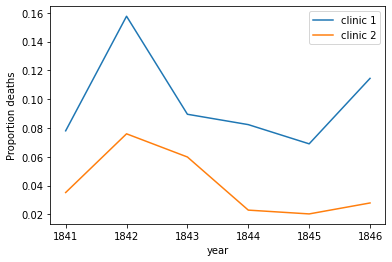

In [8]:
ax = yearly1.plot("year", "proportion_deaths",label="clinic 1")
yearly2.plot("year", "proportion_deaths",label="clinic 2", ax=ax)
ax.set_xlabel("year")
ax.set_ylabel("Proportion deaths")

**Task 4**

**Load in the dataset with the monthly number of deaths for Clinic 1**

In [9]:
monthly= pd.read_csv('monthly_deaths.csv',parse_dates=["date"])
monthly.head()

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2


In [10]:
monthly_births= monthly.iloc[:,1]
monthly_deaths= monthly.iloc[:,2]
monthly_proportion_deaths= monthly_deaths/monthly_births

In [11]:
monthly["proportion_deaths"]= monthly_proportion_deaths

In [12]:
monthly.head(1)

,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.145669


**Task 5**

**Plot the monthly proportion of deaths for Clinic 1**

Text(0, 0.5, 'Proportion deaths')

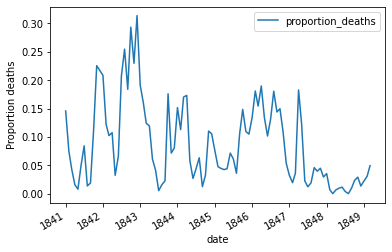

In [13]:
ax= monthly.plot('date','proportion_deaths')
ax.set_ylabel('Proportion deaths')

**Task 6**

**Split monthly into before_washing and after_washing**

In [14]:
handwashing_start = pd.to_datetime('1847-06-01')
handwashing_start

Timestamp('1847-06-01 00:00:00')

In [15]:
before_washing = monthly[monthly.date < handwashing_start]
before_washing.head()

,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843


In [16]:
after_washing = monthly[monthly.date >= handwashing_start]
after_washing.head()

,date,births,deaths,proportion_deaths
76,1847-06-01,268,6,0.022388
77,1847-07-01,250,3,0.012000
78,1847-08-01,264,5,0.018939
79,1847-09-01,262,12,0.045802
80,1847-10-01,278,11,0.039568


**Plot proportion_deaths in before_washing and after_washing into the same plot**

Text(0, 0.5, 'Proportion deaths')

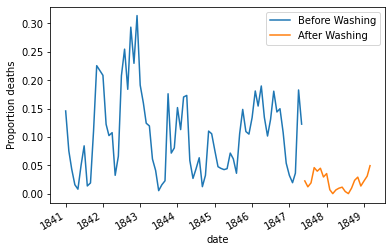

In [17]:
ax= before_washing.plot('date','proportion_deaths',label='Before Washing')
after_washing.plot('date','proportion_deaths',label='After Washing',ax=ax)
ax.set_ylabel("Proportion deaths")

**Task 7**

**Average reduction in proportion of deaths due to handwashing**

In [18]:
before_proportion= before_washing.iloc[:,3]
before_proportion.head()

0    0.145669
1    0.075314
2    0.043321
3    0.015686
4    0.007843
Name: proportion_deaths, dtype: float64

In [19]:
after_proportion= after_washing.iloc[:,3]
after_proportion.head()

76    0.022388
77    0.012000
78    0.018939
79    0.045802
80    0.039568
Name: proportion_deaths, dtype: float64

In [20]:
reduction=after_proportion.mean()-before_proportion.mean()
reduction

-0.08395660751183336

**Task 8**

**Bootstrap analysis of the difference in mean monthly proportion of deaths**

In [21]:
from numpy import percentile

In [22]:
boot_mean_diff = []

In [23]:
for i in range(3000):
    boot_before = before_proportion.sample(frac=1, replace=True)
    boot_after = after_proportion.sample(frac=1, replace=True)
    boot_mean_diff.append(boot_after.mean() - boot_before.mean())

In [24]:
confidence_interval = percentile(boot_mean_diff, [2.5, 97.5])
confidence_interval

array([-0.10102389, -0.06742482])

**Task 9**

**Doctors should wash their hands?**

Semmelweis had solid evidence that handwashing was a simple but highly effective procedure that could save many lives.